# Project 4 Intro to Machine Learning - Identify Fraud from Enron Email - Nitin Ramchand Lalwani

## Introduction

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. In this project, we will play detective by building a person of interest (POI) identifier based on financial and email data made public as a result of the Enron scandal. 

POI stands for Person of Interest.

In the following file [poi_names.txt](poi_names.txt), we can see the POI identied in USAToday article (link found at the top of the txt file).

The objective in this project is to build a supervised classification identified which can identify Person of Interests by combing email and financial data that we have.

## Dataset and Question

### Data Exploration

In [78]:
import pickle
def open_dataset():
    with open("final_project_dataset.pkl", "r") as data_file:
        data_dict = pickle.load(data_file)
    return data_dict

### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.


my_dataset = open_dataset()

The dataset has the following structure when loaded. It is a python dictionary with people's names as keys and another dictionary as values. In this dictionary, there are all the following features which will be used for the analysis. 

In [79]:
from pprint import pprint
pprint(my_dataset['ALLEN PHILLIP K'])

{'bonus': 4175000,
 'deferral_payments': 2869717,
 'deferred_income': -3081055,
 'director_fees': 'NaN',
 'email_address': 'phillip.allen@enron.com',
 'exercised_stock_options': 1729541,
 'expenses': 13868,
 'from_messages': 2195,
 'from_poi_to_this_person': 47,
 'from_this_person_to_poi': 65,
 'loan_advances': 'NaN',
 'long_term_incentive': 304805,
 'other': 152,
 'poi': False,
 'restricted_stock': 126027,
 'restricted_stock_deferred': -126027,
 'salary': 201955,
 'shared_receipt_with_poi': 1407,
 'to_messages': 2902,
 'total_payments': 4484442,
 'total_stock_value': 1729541}


The total number of people we have in the dataset are:

In [3]:
len(my_dataset)

146

As we can see below there are in total 18 names that have a Person of Interest (POI) tag since they are the ones containing a True value in for the "POI" feature. This are the number of POIs we have in the dataset, and in total we have 146 people so it means that when defining a classification algorithm, we must remember that it is not balanced with 18 POI vs 128 people with a non POI tag. 

In [4]:
poi=[]
for person in my_dataset:
    poi.append(my_dataset[person]['poi'] == True)
sum(poi)

18

In the POI_names.txt file however we have a total of 35 POIs as we see below by counting the number of lines of names in the text file, but we don't have data for all 35 POIs identified but just 18 in our dataset.

In [5]:
with open("poi_names.txt") as f:
    print len(f.readlines()[2:])

35


Now we would like to understand which how much data we have for each of the features in our dataset for the 146 people. Some values inside the dataset are shown as "NaN" and we are looking for the percetages of information in the dataset that are not "NaN"

In [6]:
import collections
from pprint import pprint
from __future__ import division
populated_data_count = collections.defaultdict(int)
populated_data_percentage = {}
features = next(my_dataset.itervalues()).keys()
for person_features in my_dataset.itervalues():
    for feature in features:
        if person_features[feature] != "NaN":
            populated_data_count[feature] += 1
for k,v in populated_data_count.iteritems():
    populated_data_percentage[k] = round((v/len(my_dataset)),4)
#pprint(populated_data_count)
pprint(populated_data_percentage)

{'bonus': 0.5616,
 'deferral_payments': 0.2671,
 'deferred_income': 0.3356,
 'director_fees': 0.1164,
 'email_address': 0.7603,
 'exercised_stock_options': 0.6986,
 'expenses': 0.6507,
 'from_messages': 0.589,
 'from_poi_to_this_person': 0.589,
 'from_this_person_to_poi': 0.589,
 'loan_advances': 0.0274,
 'long_term_incentive': 0.4521,
 'other': 0.637,
 'poi': 1.0,
 'restricted_stock': 0.7534,
 'restricted_stock_deferred': 0.1233,
 'salary': 0.6507,
 'shared_receipt_with_poi': 0.589,
 'to_messages': 0.589,
 'total_payments': 0.8562,
 'total_stock_value': 0.863}


In [7]:
import matplotlib.pyplot as plt

plt.bar(*zip(*populated_data_percentage.items()))
plt.xticks(rotation='vertical')
plt.show()

<Figure size 640x480 with 1 Axes>

From this first exploration, we see that there are some features that don't have much data so for now lets consider the threshold of relavant features to be the ones over 50% of data from all the 146 people. Below we highligh the ones that have __less than 50%__ of the people filled:

In [8]:
for k, v in populated_data_percentage.iteritems():
    if v < 0.3:
        pprint(k)
        

'deferral_payments'
'restricted_stock_deferred'
'loan_advances'
'director_fees'


Looking in more depth, for the above identified 6 features with less than 50% of data, whether from the data that they do have how many concern POIs from the 18 POIs in the dataset. If it is high, it may become a useful feature which we can analyze in further depth.

In [9]:
poi= []
deferral_payments_and_poi = []
restricted_stock_deferred_and_poi = []
deferral_income_and_poi = []
loan_advances_and_poi = []
long_term_incentive_and_poi = []
director_fees_and_poi = []
for person in my_dataset:
    restricted_stock_deferred_and_poi.append((my_dataset[person]['restricted_stock_deferred'] != "NaN") & (my_dataset[person]['poi'] == True))
    poi.append(my_dataset[person]['poi'] == True)
    deferral_payments_and_poi.append((my_dataset[person]['deferral_payments'] != "NaN") & (my_dataset[person]['poi'] == True) )
    deferral_income_and_poi.append((my_dataset[person]['deferred_income'] != "NaN") & (my_dataset[person]['poi'] == True))
    loan_advances_and_poi.append((my_dataset[person]['loan_advances'] != "NaN") & (my_dataset[person]['poi'] == True))
    long_term_incentive_and_poi.append((my_dataset[person]['long_term_incentive'] != "NaN") & (my_dataset[person]['poi'] == True))
    director_fees_and_poi.append((my_dataset[person]['director_fees'] != "NaN") & (my_dataset[person]['poi'] == True))
print "deferral_income_and_poi" , sum(deferral_income_and_poi)
print "loan_advances_and_poi" ,sum(loan_advances_and_poi)
print "restricted_stock_deferred_and_poi" ,sum(restricted_stock_deferred_and_poi)
print "deferral_payments_and_poi" , sum(deferral_payments_and_poi)
print "long_term_incentive_and_poi" ,sum(long_term_incentive_and_poi)
print "director_fees_and_poi" ,sum(director_fees_and_poi)





deferral_income_and_poi 11
loan_advances_and_poi 1
restricted_stock_deferred_and_poi 0
deferral_payments_and_poi 5
long_term_incentive_and_poi 12
director_fees_and_poi 0


We see that for the deferral_income and long_term_incentive features there is not much information overall (for less than 50% of people in the dataset) but there is significantly high percentage of data for those people that have a __True__ tag in POI. So for our analysis as of now, we will only discard the other four features but we can keep these two just incase they provide us good information for the classification algorithms.

In [10]:
import warnings
warnings.filterwarnings('ignore')

### Outlier Removal

As seen in the mini project work of the course, the 'TOTAL' key in the dataset dictionary is probably a spreadsheet error and is an obvious outlier that we can remove.

In [11]:
my_dataset.pop('TOTAL',0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

And below we see that it has been removed successfully as it no longer appears.

In [12]:
#if 'TOTAL' in my_dataset:
    
#my_dataset['TOTAL']
'TOTAL' in my_dataset

False

The next step in identifying outliers is to 

In [13]:
my_dataset['ALLEN PHILLIP K']

{'bonus': 4175000,
 'deferral_payments': 2869717,
 'deferred_income': -3081055,
 'director_fees': 'NaN',
 'email_address': 'phillip.allen@enron.com',
 'exercised_stock_options': 1729541,
 'expenses': 13868,
 'from_messages': 2195,
 'from_poi_to_this_person': 47,
 'from_this_person_to_poi': 65,
 'loan_advances': 'NaN',
 'long_term_incentive': 304805,
 'other': 152,
 'poi': False,
 'restricted_stock': 126027,
 'restricted_stock_deferred': -126027,
 'salary': 201955,
 'shared_receipt_with_poi': 1407,
 'to_messages': 2902,
 'total_payments': 4484442,
 'total_stock_value': 1729541}

In [14]:
bonus = []
deferred_income = []
email_address = []
exercised_stock_options = []
expenses = []
from_messages = []
from_poi_to_this_person = []
from_this_person_to_poi = []
long_term_incentive = []
other = []
restricted_stock = []
salary = []
shared_receipt_with_poi = []
to_messages = []
total_payments = []
total_stock_value = []
for person in my_dataset:
    bonus.append(my_dataset[person]['bonus'])
    deferred_income.append(my_dataset[person]['deferred_income'])
    email_address.append(my_dataset[person]['email_address'])
    exercised_stock_options.append(my_dataset[person]['exercised_stock_options'])
    expenses.append(my_dataset[person]['expenses'])
    from_messages.append(my_dataset[person]['from_messages'])
    from_poi_to_this_person.append(my_dataset[person]['from_poi_to_this_person'])
    from_this_person_to_poi.append(my_dataset[person]['from_this_person_to_poi'])
    long_term_incentive.append(my_dataset[person]['long_term_incentive'])
    other.append(my_dataset[person]['other'])
    restricted_stock.append(my_dataset[person]['restricted_stock'])
    salary.append(my_dataset[person]['salary'])
    shared_receipt_with_poi.append(my_dataset[person]['shared_receipt_with_poi'])
    to_messages.append(my_dataset[person]['to_messages'])
    total_payments.append(my_dataset[person]['total_payments'])
    total_stock_value.append(my_dataset[person]['total_stock_value'])

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

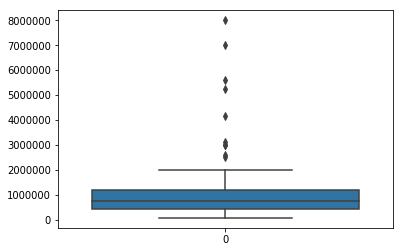

In [16]:
sns.boxplot(data=bonus);

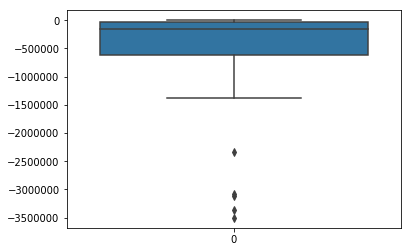

In [17]:
sns.boxplot(data=deferred_income);

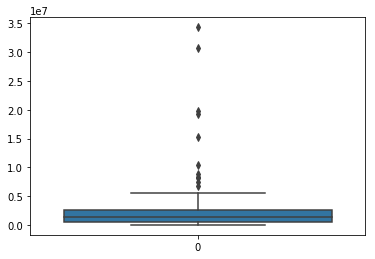

In [18]:
sns.boxplot(data=exercised_stock_options);

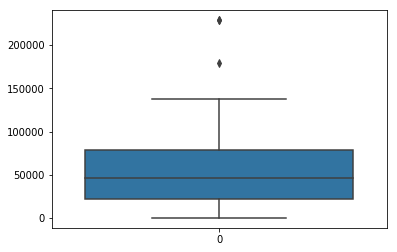

In [19]:
sns.boxplot(data=expenses);

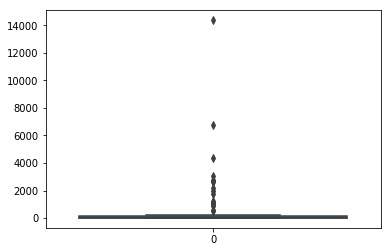

In [20]:
sns.boxplot(data=from_messages);

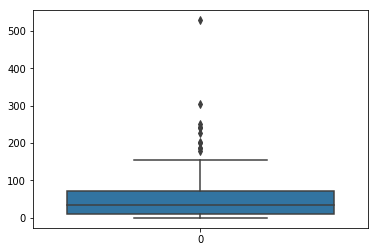

In [21]:
sns.boxplot(data=from_poi_to_this_person);

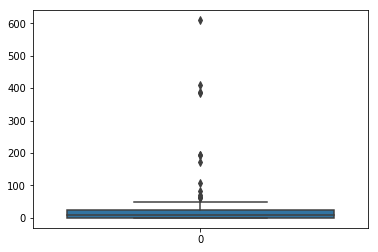

In [22]:
sns.boxplot(data=from_this_person_to_poi);

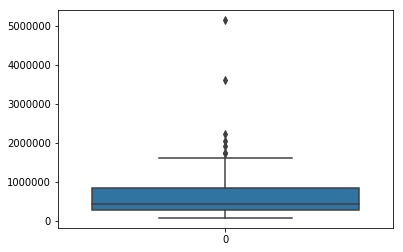

In [23]:
sns.boxplot(data=long_term_incentive);

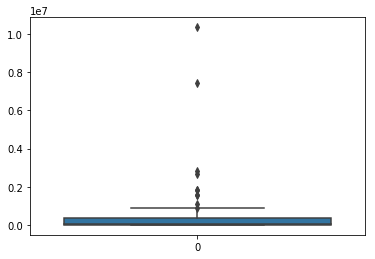

In [24]:
sns.boxplot(data=other);

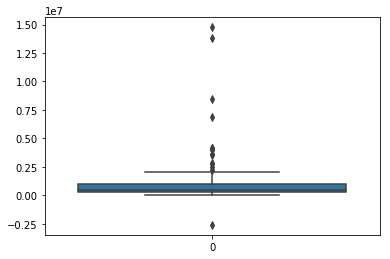

In [25]:
sns.boxplot(data=restricted_stock);

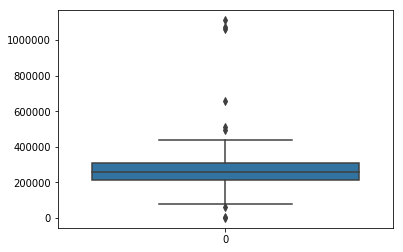

In [26]:
sns.boxplot(data=salary);

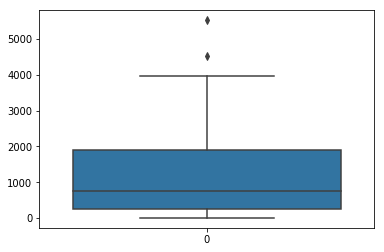

In [27]:
sns.boxplot(data=shared_receipt_with_poi);

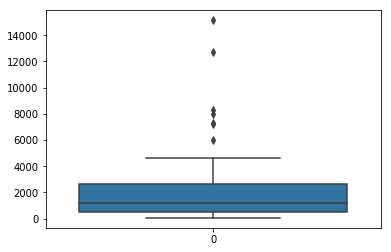

In [28]:
sns.boxplot(data=to_messages);

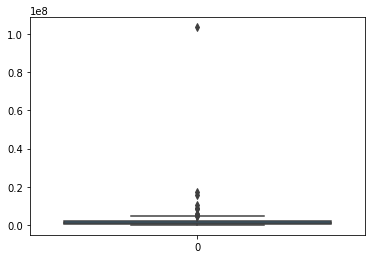

In [29]:
sns.boxplot(data=total_payments);

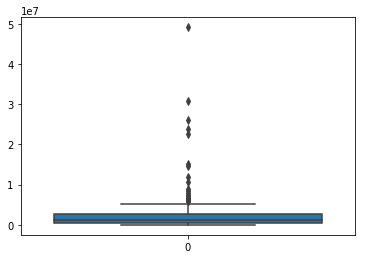

In [30]:
sns.boxplot(data=total_stock_value);

Below we look at some of the points that show as possible outliers from the boxplots shown above. 

In [31]:
for people in my_dataset:
    if (my_dataset[people]['total_payments'] > 1e8) & (my_dataset[people]['total_payments'] !='NaN'):
        print people

LAY KENNETH L


In [32]:
for people in my_dataset:
    if (my_dataset[people]['total_stock_value'] > 4e7) & (my_dataset[people]['total_stock_value'] !='NaN'):
        print people

LAY KENNETH L


In [33]:
for people in my_dataset:
    if (my_dataset[people]['to_messages'] > 10000) & (my_dataset[people]['to_messages'] !='NaN'):
        print people

SHAPIRO RICHARD S
KEAN STEVEN J


In [34]:
for people in my_dataset:
    if (my_dataset[people]['shared_receipt_with_poi'] > 4000) & (my_dataset[people]['shared_receipt_with_poi'] !='NaN'):
        print people

SHAPIRO RICHARD S
BELDEN TIMOTHY N


In [35]:
for people in my_dataset:
    if (my_dataset[people]['salary'] > 800000) & (my_dataset[people]['salary'] !='NaN'):
        print people

LAY KENNETH L
SKILLING JEFFREY K
FREVERT MARK A


In [36]:
for people in my_dataset:
    if (my_dataset[people]['restricted_stock'] < 0) & (my_dataset[people]['restricted_stock'] !='NaN'):
        print people

BHATNAGAR SANJAY


In [37]:
for people in my_dataset:
    if (my_dataset[people]['other'] > 0.6e7) & (my_dataset[people]['other'] !='NaN'):
        print people

LAY KENNETH L
FREVERT MARK A


In [38]:
for people in my_dataset:
    if (my_dataset[people]['long_term_incentive'] > 3000000) & (my_dataset[people]['long_term_incentive'] !='NaN'):
        print people

LAY KENNETH L
MARTIN AMANDA K


In [39]:
for people in my_dataset:
    if (my_dataset[people]['from_this_person_to_poi'] > 300) & (my_dataset[people]['from_this_person_to_poi'] !='NaN'):
        print people

BECK SALLY W
LAVORATO JOHN J
DELAINEY DAVID W
KEAN STEVEN J


In [40]:
for people in my_dataset:
    if (my_dataset[people]['from_poi_to_this_person'] > 300) & (my_dataset[people]['from_poi_to_this_person'] !='NaN'):
        print people

LAVORATO JOHN J
DIETRICH JANET R


In [41]:
for people in my_dataset:
    if (my_dataset[people]['from_messages'] > 8000) & (my_dataset[people]['from_messages'] !='NaN'):
        print people

KAMINSKI WINCENTY J


In [42]:
for people in my_dataset:
    if (my_dataset[people]['expenses'] > 150000) & (my_dataset[people]['expenses'] !='NaN'):
        print people

SHANKMAN JEFFREY A
URQUHART JOHN A
MCCLELLAN GEORGE


In [43]:
for people in my_dataset:
    if (my_dataset[people]['exercised_stock_options'] > 2.5e7) & (my_dataset[people]['exercised_stock_options'] !='NaN'):
        print people

LAY KENNETH L
HIRKO JOSEPH


After digging deeper into the dataset and the people identified above. None of these are identified as outliers that have to be elimiated for now in the dataset. Some of them have really high financial values and some high amount of email send and received but in fact these may be the people that we will classify as POIs. High level managers in companies usually have high salaries and bonuses so we don't remove these points for now. However digging deeper into the dataset, we did find that there is a point in the dataset with 'THE TRAVEL AGENCY IN THE PARK' as a person and this makes us think that it is an error in the dataset so we remove this point. 

In [44]:
my_dataset.pop('THE TRAVEL AGENCY IN THE PARK',0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

And we see below that it has been deleted from the the enron dataset.

In [45]:
'THE TRAVEL AGENCY IN THE PARK' in my_dataset

False

## Feature Selection

### Creating New Features

Like conducted in the Feature Selection part of this course, we use our human intuition to understand what features may be relevant to distiniguish a POI from a non-POI. So regarding the email data that we have instead of using from_this_person_to_poi and from poi_to_this_person, we create fraction features that tell us how many of the total emails send correpsond to and from POI which is a variable that at a first glance seems much more poweful than just the amount of emails send to and from POIs. 

So as done in Lesson 12: Feature Selection course, we define the following two features.

__fraction_to_this_person_from_poi__ = from_poi_to_this_person/to_messages <br>
__fraction_from_this_person_to_poi__ = from_this_person_to_poi/from_messages



At this stage we realize that the only other email data we have, is the shared_receipt_with_poi feature, and that the same way we will also create a feature which is a fraction of this number with the to_messages feature since the shared_receipt_with_poi fewature defines the number of received messaged that also were send to POIs. 

New feature:

__fraction_shared_receipt_with_poi__ = shared_receipt_with_poi/to_messages

The above new features are the ones that make sense in terms of the email data that is in the dataset. However, with regards to the features regarding the financial data, we see that in the box plots we have some people with really high financial informaiton. Now using our judgment, these high salaries correspond to real people and they don't seem to be error points if not important people in the company receving high sums of money. An interesting feature however may be to look at the ratio of some of the financial figures like for example bonus / salary. It is normal that someone with a high salary receives a large amount of bonus. However what could help us to identify suspisious behaviour and therefore potential POIs is if the ratio of the two is higher than usual. 

Therefore with regards to the financial features we create new features being the ratio of the feature with the salary:

__ratio_bonus_salary__ = bonus/salary<br>
__ratio_total_stock_value_salary__ = total_stock_value/salary<br>
__ratio_total_payments_salary__ = total_payments/salary<br>
__ratio_deferred_income_salary__ = deferred_income/salary<br>
__ratio_other_salary__ = other/salary<br>
__ratio_long_term_incentive_salary__ = long_term_incentive/salary<br>
__ratio_expenses_salary__ = expenses/salary<br>
__ratio_exercised_stock_options_salary__ = exercised_stock_options/salary<br>
__ratio_restricted_stock_salary__ = restricted_stock/salary<br>



Now in order to choose the best features, we have automatic methods that fall under the umbrella of univariate feature selection to identify how good the features will be for our POI classifier. 

In [46]:
from sklearn.feature_selection import SelectPercentile, SelectKBest, f_classif

So to find out what are the best features, we first need to add the above defined features in our dataset as a feature. 

In [47]:
def add_features_ratio(my_dataset,new_feature, feature_nominator, feature_denominator):
    for person in my_dataset:
        if (my_dataset[person][feature_nominator] !='NaN') & (my_dataset[person][feature_denominator] !='NaN'):
            my_dataset[person][new_feature] = my_dataset[person][feature_nominator] / my_dataset[person][feature_denominator]
        else:
            my_dataset[person][new_feature] = 'NaN'

In [83]:
add_features_ratio(my_dataset=my_dataset, new_feature='fraction_from_this_person_to_poi', feature_nominator='from_this_person_to_poi', feature_denominator='from_messages')
add_features_ratio(my_dataset=my_dataset, new_feature='fraction_to_this_person_from_poi', feature_nominator='from_poi_to_this_person', feature_denominator='to_messages')
add_features_ratio(my_dataset=my_dataset, new_feature='fraction_shared_receipt_with_poi', feature_nominator='shared_receipt_with_poi', feature_denominator='to_messages')
add_features_ratio(my_dataset=my_dataset, new_feature='ratio_bonus_salary', feature_nominator='bonus', feature_denominator='salary')
add_features_ratio(my_dataset=my_dataset, new_feature='ratio_total_stock_value_salary', feature_nominator='total_stock_value', feature_denominator='salary')
add_features_ratio(my_dataset=my_dataset, new_feature='ratio_total_payments_salary', feature_nominator='total_payments', feature_denominator='salary')
add_features_ratio(my_dataset=my_dataset, new_feature='ratio_deferred_income_salary', feature_nominator='deferred_income', feature_denominator='salary')
add_features_ratio(my_dataset=my_dataset, new_feature='ratio_other_salary', feature_nominator='other', feature_denominator='salary')
add_features_ratio(my_dataset=my_dataset, new_feature='ratio_long_term_incentive_salary', feature_nominator='long_term_incentive', feature_denominator='salary')
add_features_ratio(my_dataset=my_dataset, new_feature='ratio_expenses_salary', feature_nominator='expenses', feature_denominator='salary')
add_features_ratio(my_dataset=my_dataset, new_feature='ratio_exercised_stock_options_salary', feature_nominator='exercised_stock_options', feature_denominator='salary')
add_features_ratio(my_dataset=my_dataset, new_feature='ratio_restricted_stock_salary', feature_nominator='restricted_stock', feature_denominator='salary')


For this we first we create a list of all the features in our enron dataset

In [49]:
features_analysis = next(my_dataset.itervalues()).keys()

Next we remove the features that we found before that we will not look in our analysis due to lack of information.

In [50]:
#features_to_exclude = ['deferral_payments','loan_advances','restricted_stock_deferred', 'director_fees', 'email_address', 'poi']

In [51]:
for exclude in features_to_exclude:
    features_analysis.remove(exclude)
    

NameError: name 'features_to_exclude' is not defined

In [52]:
features_analysis.remove('poi')

Next we add the features in this list that we defined above which are ratios of financial and email features.  

In [53]:
features_analysis_poi_first = ['poi'] + features_analysis
features_analysis_poi_first

['poi',
 'to_messages',
 'deferral_payments',
 'expenses',
 'deferred_income',
 'email_address',
 'long_term_incentive',
 'ratio_expenses_salary',
 'ratio_long_term_incentive_salary',
 'ratio_other_salary',
 'ratio_restricted_stock_salary',
 'restricted_stock_deferred',
 'shared_receipt_with_poi',
 'loan_advances',
 'from_messages',
 'other',
 'director_fees',
 'ratio_exercised_stock_options_salary',
 'ratio_bonus_salary',
 'ratio_deferred_income_salary',
 'fraction_shared_receipt_with_poi',
 'bonus',
 'total_stock_value',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'ratio_total_stock_value_salary',
 'restricted_stock',
 'fraction_from_this_person_to_poi',
 'salary',
 'ratio_total_payments_salary',
 'total_payments',
 'exercised_stock_options',
 'fraction_to_this_person_from_poi']

In [63]:
features_list_all = ['poi',
 'salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'fraction_shared_receipt_with_poi',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'fraction_from_this_person_to_poi',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'from_poi_to_this_person']

In [72]:
del feature_array
feature_array = range(1,len(features_list_all))
type (feature_array)

list

In [81]:
import sys
sys.path.append("../tools/")
import pickle
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from pprint import pprint
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [84]:
data = featureFormat(my_dataset, features_list_all, sort_keys = True)
labels, features = targetFeatureSplit(data)


In [85]:
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(features, labels)
pprint(sorted(zip(selector.scores_, features_list_all[1:]), reverse=True))


[(16.873870264572993, 'fraction_from_this_person_to_poi'),
 (9.49145795071451, 'fraction_shared_receipt_with_poi'),
 (8.903821557165571, 'shared_receipt_with_poi'),
 (5.446687483325353, 'from_poi_to_this_person'),
 (2.5182610445203437, 'loan_advances'),
 (2.470521222656084, 'from_this_person_to_poi'),
 (1.7516942790340737, 'to_messages'),
 (0.5490842014798087, 'director_fees'),
 (0.3496271530428018, 'total_payments'),
 (0.23899588985313305, 'deferral_payments'),
 (0.22826733729104948, 'exercised_stock_options'),
 (0.21950572394230994, 'deferred_income'),
 (0.16611912320976677, 'total_stock_value'),
 (0.1587702392129193, 'from_messages'),
 (0.07794885577722988, 'bonus'),
 (0.06819451915955863, 'other'),
 (0.031333216297618476, 'restricted_stock'),
 (0.022229270861607336, 'long_term_incentive'),
 (0.01397841382175243, 'expenses'),
 (0.004173192280508668, 'restricted_stock_deferred'),
 (0.000160054245696184, 'salary')]


In [60]:
def optimal_feature_estimator(pipeline, param_grid, sss, features, labels):
    grid = GridSearchCV(pipeline, param_grid, verbose = 0, cv = sss, scoring = 'f1')
    t0 = time()
    grid.fit(features, labels)
    print "training time: ", round(time()-t0, 3), "s"
    print grid.best_params_
    return grid.best_estimator_, grid.best_score_ 

skb = SelectKBest(f_classif)
clf_gaussian_NB = GaussianNB()
pipeline_GaussianNB = Pipeline(steps = [("SKB", skb), ("NaiveBayes",clf_gaussian_NB)])
f1_score = []
feature_array = np.arange(1,len(features_list_all))
sss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=32)
skb = SelectKBest(f_classif)
for features in feature_array:
    # ##Algorithm 1 GaussianNaive Bayes
    clf_gaussian_NB = GaussianNB()
    clf = SelectKBest(k=features)
    clf.fit
    
    param_grid_GaussianNB = {"SKB__k": features}
    clf_Gaussian_best, f1score_GaussianNB = optimal_feature_estimator(pipeline=pipeline_GaussianNB, param_grid=param_grid_GaussianNB, sss=sss, features=features, labels=labels)
    f1_score.append(f1score_GaussianNB)
    print 'scores Gaussian NB', scores_Gaussian_NB

NameError: name 'labels' is not defined

In [ ]:
f1_score = []
sss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=32)

param_grid_GaussianNB = {"SKB__k":[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]}
clf_Gaussian_best, f1score_GaussianNB = optimal_feature_estimator(pipeline=pipeline_GaussianNB, param_grid=param_grid_GaussianNB, sss=sss, features=features, labels=labels)
f1_score.append(f1score_GaussianNB)
print 'scores Gaussian NB', f1score_GaussianNB

In [ ]:
range(1,len(f)

In [ ]:
df = pd.DataFrame(0, index=np.arange(1,n_splits), columns=['accuracy_score','precision','recall','f1_score'])
df.index.name = 'n_split'
#    sss = StratifiedShuffleSplit(n_splits, test_size, random_state)
    for i, (e_train, e_test) in enumerate(sss.split(features, labels)):
        features_test = []
        labels_test = []
        features_train = []
        labels_train = []
        for k in e_train:
            labels_train.append(labels[k])
            features_train.append(features[k])
        for k in e_test:
            labels_test.append(labels[k])
            features_test.append(features[k])
        clf.fit(features_train,labels_train)
        prediction = clf.predict(features_test)
        df.loc[i,'accuracy_score'] = accuracy_score(labels_test, prediction)
        df.loc[i,'precision'] = precision_score(labels_test, prediction)
        df.loc[i,'recall'] = recall_score(labels_test, prediction)
        df.loc[i,'f1_score'] = f1_score(labels_test, prediction)

In [ ]:
def add_features_ratio(my_dataset,new_feature, feature_nominator, feature_denominator):
    for person in my_dataset:
        if (my_dataset[person][feature_nominator] !='NaN') & (my_dataset[person][feature_denominator] !='NaN'):
            my_dataset[person][new_feature] = float(my_dataset[person][feature_nominator]) / float(my_dataset[person][feature_denominator])
        else:
            my_dataset[person][new_feature] = 'NaN'
    return my_dataset

features_list = ['poi',
 'expenses',
 'deferred_income',
 'long_term_incentive',
 'other',
 'fraction_shared_receipt_with_poi',
 'bonus',
 'total_stock_value',
 'from_poi_to_this_person',
 'restricted_stock',
 'fraction_from_this_person_to_poi',
 'salary',
 'total_payments',
 'exercised_stock_options']

In [ ]:
import sys
from pprint import pprint
from sklearn.feature_selection import SelectPercentile, SelectKBest, f_classif
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

selector = SelectKBest(score_func=f_classif, k=5)
data = featureFormat(my_dataset, features_analysis_poi_first, sort_keys = True)
labels, features = targetFeatureSplit(data)
selector.fit(features, labels)
pprint(sorted(zip(selector.scores_, features_analysis_poi_first[1:]), reverse=True))

A lot of the above features are ones that have been created in order to look at their scores. Mostly for the financial features new features which consistent of a financial feature ratio to the salary was created but we can see that all of these have very low ratio except for bonu/salary ratio. however bonus and salary by themselves have higher ratio therefore non of the financial new features tested are included.

With respect to the email features, ratios of:<br>
__fraction_from_this_person_to_poi__ = from_this_person_to_poi/from_messages <br>
__fraction_shared_receipt_with_poi__ = shared_receipt_with_poi/to_messages <br>
both have better score than the features by themselves and they seem to be interesting features since more than the absolute value of emails received or sent, it seems interesting to look at what ratio are sent to POIs or shared with POIs. Here the scores of the features that will be considered:

In [ ]:
import sys
from pprint import pprint
from sklearn.feature_selection import SelectPercentile, SelectKBest, f_classif
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

selector = SelectKBest(score_func=f_classif, k=5)
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
selector.fit(features, labels)
pprint(sorted(zip(selector.scores_, features_analysis_poi_first[1:]), reverse=True))

Adding all the packages that are needed when implementing the algorithms

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from pprint import pprint
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

Below the two functions created in order to calculate the scores for the optimal features and selecting the estimator that has the most optimal F1 score for a given number of features. 

In [ ]:
def optimal_feature_estimator(pipeline, param_grid, sss, features, labels):
    grid = GridSearchCV(pipeline, param_grid, verbose = 0, cv = sss, scoring = 'f1')
    t0 = time()
    grid.fit(features, labels)
    print "training time: ", round(time()-t0, 3), "s"
    print grid.best_params_
    return grid.best_estimator_, grid.best_score_ 


def optimal_features_scores_calculation(n_splits, sss, clf, features, labels):
    df = pd.DataFrame(0, index=np.arange(1,n_splits), columns=['accuracy_score','precision','recall','f1_score'])
    df.index.name = 'n_split'
#    sss = StratifiedShuffleSplit(n_splits, test_size, random_state)
    for i, (e_train, e_test) in enumerate(sss.split(features, labels)):
        features_test = []
        labels_test = []
        features_train = []
        labels_train = []
        for k in e_train:
            labels_train.append(labels[k])
            features_train.append(features[k])
        for k in e_test:
            labels_test.append(labels[k])
            features_test.append(features[k])
        clf.fit(features_train,labels_train)
        prediction = clf.predict(features_test)
        df.loc[i,'accuracy_score'] = accuracy_score(labels_test, prediction)
        df.loc[i,'precision'] = precision_score(labels_test, prediction)
        df.loc[i,'recall'] = recall_score(labels_test, prediction)
        df.loc[i,'f1_score'] = f1_score(labels_test, prediction)
    return df.mean(axis=0)

For the Gaussian NB the best F1 score and the optimal number of features was found to be: F! score = 0.343, 11 features to give this value

In [ ]:
import warnings
warnings.filterwarnings('ignore')

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
sss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=32)
skb = SelectKBest(f_classif)

##Algorithm 1 GaussianNaive Bayes
clf_gaussian_NB = GaussianNB()
pipeline_GaussianNB = Pipeline(steps = [("SKB", skb), ("NaiveBayes",clf_gaussian_NB)])
param_grid_GaussianNB = {"SKB__k": range(1,len(features_list))}
clf_Gaussian_best, f1score_GaussianNB = optimal_feature_estimator(pipeline=pipeline_GaussianNB, param_grid=param_grid_GaussianNB, sss=sss, features=features, labels=labels)
scores_Gaussian_NB = optimal_features_scores_calculation(n_splits=100, sss=sss, clf=clf_Gaussian_best, features=features, labels=labels)
print 'scores Gaussian NB', scores_Gaussian_NB

For the KNN algorithm we tune the parameter also of nearest neighbour and this gives us that the optimal is at 1 neighbour and for 3 features with a F1 score of 0.240

In [ ]:
import warnings
warnings.filterwarnings('ignore')

clf_knn = KNeighborsClassifier()
scaler = MinMaxScaler()
skb = SelectKBest(f_classif)
pipeline_knn = Pipeline(steps = [("scaling", scaler), ("SKB", skb), ("knn",clf_knn)])
param_grid_knn = {"SKB__k": range(1,len(features_list)), "knn__n_neighbors": range(1,len(features_list))}
clf_knn_best, f1score_knn = optimal_feature_estimator(pipeline=pipeline_knn, param_grid=param_grid_knn, sss=sss, features=features, labels=labels)
scores_knn = optimal_features_scores_calculation(n_splits=100, sss=sss, clf=clf_knn_best, features=features, labels=labels)
print 'scores K neareast Neighbour', scores_knn

And finally for the Decision Tree algorithm, we can tune many more parameters and in this case we did so for max_depth, criterion and min samples split. Running the grid search leads to the optimal parameters of crierion = entropy, max_depth=2, min_samples_split = 10 and finally optimal number of features is 12. The F1 score obtainted for this was of 0.304

In [ ]:
import warnings
warnings.filterwarnings('ignore')

clf_dtree = DecisionTreeClassifier()
pipeline_DT = Pipeline(steps = [("SKB", skb), ("DT",clf_dtree)])
param_grid_DT = {"SKB__k": range(1,len(features_list)), 'DT__max_depth': [2,5,10,15,20], 'DT__min_samples_split': [2,4,6,8,10], 'DT__criterion': ['gini','entropy']}
clf_DT_best, f1score_DT = optimal_feature_estimator(pipeline=pipeline_DT, param_grid=param_grid_DT, sss=sss, features=features, labels=labels)
scores_DT = optimal_features_scores_calculation(n_splits=100, sss=sss, clf=clf_DT_best, features=features, labels=labels)
print 'scores Decision Tree', scores_DT

if (f1score_GaussianNB > f1score_knn) & (f1score_GaussianNB > f1score_DT):
    clf = clf_Gaussian_best
    print 'best algorithm is Gaussian NB with f1 score', f1score_GaussianNB
elif (f1score_knn > f1score_GaussianNB) & (f1score_knn > f1score_DT):
    clf = clf_knn_best
    print 'best algorithm is K Nearest Neighbour with f1 score', f1score_knn
else:
    clf = clf_DT_best
    print 'best algorithm is Decision Tree with f1 score', f1score_DT

The F1 score is a harmonic mean of the precision and recall so it is chosen as the evaluation metric to be optimized. The relevance of precision and recall as evaluation metric for this particular project are explained in the Enron_Submission_Final_Answers_NitinRamchandLalwani.html file. This is more relevant than the accuracy metric also explained in Wuestion 6 of the html mentioned. Furthermore, the references used to write up this report are given in the final answers document. 

For this project, finally the identifier that was chosen was the one giving the best F1 score which was the Gaussian Naive Bayes algorithm.